In [70]:
import pandas as pd
from sklearn.neighbors  import KNeighborsClassifier
import numpy as np

In [225]:
train = pd.read_csv('adult.data.csv')
test = pd.read_csv('adult.test.csv')




In [270]:
train['target'] = train['target'].astype('category')
test['target'] = test['target'].astype('category')
train['target'] = train['target'].cat.codes
test['target'] = test['target'].cat.codes


In [282]:
train.head()

,age,workclass,weight,education-num,status,occupation,relationship,race,sex,gain,loss,hpw,country,target
16280,27,4,187981,9,4,6,3,4,1,0,0,40,39,0
16281,55,4,393768,11,2,4,0,4,1,0,0,40,39,0
16282,38,4,108726,9,2,4,0,4,1,0,0,40,39,1
16283,31,4,180551,9,2,1,5,4,0,0,0,40,39,1
16284,51,6,176240,12,2,12,0,4,1,0,0,40,39,1


In [271]:
data = pd.concat([train,test])

In [272]:
data[32561:]

,age,workclass,weight,education-num,status,occupation,relationship,race,sex,gain,loss,hpw,country,target
16280,27,4,187981,9,4,6,3,4,1,0,0,40,39,0
16281,55,4,393768,11,2,4,0,4,1,0,0,40,39,0
16282,38,4,108726,9,2,4,0,4,1,0,0,40,39,1
16283,31,4,180551,9,2,1,5,4,0,0,0,40,39,1
16284,51,6,176240,12,2,12,0,4,1,0,0,40,39,1
16285,56,4,70720,8,2,10,0,4,1,0,0,40,39,1
16286,39,4,35890,12,2,7,0,4,1,0,0,40,39,0
16287,50,4,283676,10,2,3,0,4,1,0,0,40,39,1
16288,34,2,105540,13,2,10,0,4,1,0,2051,40,39,0
16289,44,4,408717,9,0,12,1,4,1,3674,0,50,39,0


In [273]:
list(data.columns.values)

['age',
 'workclass',
 'weight',
 'education-num',
 'status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'gain',
 'loss',
 'hpw',
 'country',
 'target']

In [192]:
train.groupby('education').count()

,age,workclass,weight,education-num,status,occupation,relationship,race,sex,gain,loss,hpw,country,target
education,,,,,,,,,,,,,,
10th,933,933,933,933,933,933,933,933,933,933,933,933,933,933
11th,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175
12th,433,433,433,433,433,433,433,433,433,433,433,433,433,433
1st-4th,168,168,168,168,168,168,168,168,168,168,168,168,168,168
5th-6th,333,333,333,333,333,333,333,333,333,333,333,333,333,333
7th-8th,646,646,646,646,646,646,646,646,646,646,646,646,646,646
9th,514,514,514,514,514,514,514,514,514,514,514,514,514,514
Assoc-acdm,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067,1067
Assoc-voc,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382


In [193]:
train_cat = train.select_dtypes(include=['object']).copy()
train_cat.head(15)

,workclass,education,status,occupation,relationship,race,sex,country,target
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [194]:
train.describe()

,age,weight,education-num,gain,loss,hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


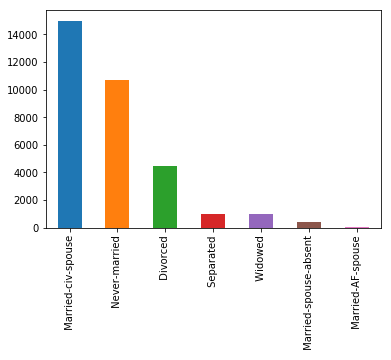

In [89]:
train['status'].value_counts().plot('bar')

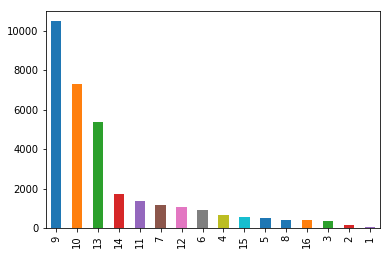

In [91]:
train['education-num'].value_counts().plot('bar')

In [274]:
data['country'] = data['country'].astype('category')
data['sex'] = data['sex'].astype('category')
data['race'] = data['race'].astype('category')
data['country'] = data['country'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data['status'] = data['status'].astype('category')
data['workclass'] = data['workclass'].astype('category')
data['relationship'] = data['relationship'].astype('category')


In [275]:
test_cat = test.select_dtypes(include=['category']).copy()
test_cat.head(15)

""
0
1
2
3
4
5
6
7
8
9


In [276]:
data['country'] = data['country'].cat.codes
data['sex'] = data['sex'].cat.codes
data['race'] = data['race'].cat.codes
data['relationship'] = data['relationship'].cat.codes
data['occupation'] = data['occupation'].cat.codes
data['status'] = data['status'].cat.codes
data['workclass'] = data['workclass'].cat.codes


In [278]:
train = data[32561:]
test = data[:32560]

In [283]:
n = 5 
results = []
features=['age', 'workclass', 'weight', 'education-num', 'status', 'occupation',
       'relationship', 'race', 'sex', 'gain', 'loss', 'hpw', 'country']

clf = KNeighborsClassifier(n_neighbors=n)
clf.fit(train[features],train['target'])
preds = clf.predict(test[features])
accuracy = np.where( preds == test['target'],1,0).sum() / float(len(test))*100

In [284]:
accuracy

77.22665847665847

In [285]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train[features], train['target'])
preds = gnb.predict(test[features])
print(preds)

[0 0 0 ... 0 0 0]


In [289]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy
print(accuracy_score(test['target'], preds)*100)

79.37653562653563


 <=50K.    12435
 >50K.      3846
Name: target, dtype: int64

 <=50K    24720
 >50K      7840
Name: target, dtype: int64